# LEAD SCORING CASE STUDY

### PROBLEM STATEMENT:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### OUR GOALS OF THE CASE STUDY:
  
  - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
    - There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well. 

### STEP:
- 1:Read and Understand the data
- 2:Clean the Data
- 3:Visualize the data
- 4:Preparing Data for Modelling
- 5:Model Building
- 6:Model Evaluation
- 7:Making Prediction

## STEP 1: Read and Understand the data

## I: Read the Data

In [1442]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1443]:
# import dataset
lead_data = pd.read_csv("leads.csv")
pd.set_option('display.max_columns', 50)

In [1444]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Our Target Variable is "Converted"

## II: Understanding the Data

In [1445]:
# Check shape
lead_data.shape

(9240, 37)

In [1446]:
# Check info()
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1447]:
# Check describe for numeric variable
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 - All dtypes are okay 
 - In many of variables, we see that a unwanted "select" value is present.
     we impute it nan value

In [1448]:
lead_data = lead_data.replace("Select", np.nan)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## STEP 2: Clean the Data

- Let's check the null value

In [1449]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1450]:
# check null value
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- Huge number of missing values are present in this data, So we need to handle them.

In [1451]:
# Check the null value percentage for every variables

print(round(lead_data.isnull().sum()*100/len(lead_data)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

- 1 st we drop all these columns where null value is presented >30%.

In [1452]:
null_30 = ["Specialization","How did you hear about X Education","Tags", "Lead Quality","Lead Profile","City", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"]
null_30

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [1453]:
# Drop columns >30% null value
lead_data = lead_data.drop(null_30,axis=1)
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1454]:
# Recheck the null percentage
print(round(lead_data.isnull().sum()*100/len(lead_data)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

### Handle null value for numeric variables

##### "TotalVisits" handling

In [1455]:
lead_data["TotalVisits"].mean()

3.445237833681204

In [1456]:
# imput the null value with mean
lead_data.TotalVisits.fillna(lead_data.TotalVisits.mean(),inplace=True)

In [1457]:
lead_data["TotalVisits"].isnull().sum()

0

##### "Page Views Per Visit" handling

In [1458]:
lead_data["Page Views Per Visit"].mean()

2.3628199494672084

In [1459]:
# imput the null value with mean
lead_data["Page Views Per Visit"].fillna(lead_data["Page Views Per Visit"].mean(),inplace=True)

In [1460]:
lead_data["Page Views Per Visit"].isnull().sum()

0

- Numeric variables handling completed, now handle categorical variables.

### Handle null value for categorical variables

##### "Last Activity" handling

In [1461]:
lead_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1462]:
# imput the null value with mode
lead_data["Last Activity"].fillna(lead_data["Last Activity"].mode()[0],inplace=True)

In [1463]:
lead_data["Last Activity"].isnull().sum()

0

##### "Country" handling

In [1464]:
# check null value
lead_data["Country"].isnull().sum()

2461

In [1465]:
# Check percentage
lead_data["Country"].value_counts(dropna=False, normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

- Here we see that:
    - India = 70%
    - Missing value = 27%
    - Others = 3 %
    
- So we impute as:
    - India = India
    - Missing value = Missing
    - Others Country = Others_country 

In [1466]:
# First impute missing value with Missing
lead_data["Country"].fillna("Missing", inplace=True)
lead_data["Country"].isnull().sum()

0

In [1467]:
lead_data["Country"].value_counts()

India                   6492
Missing                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1468]:
# Impute Others country with Others_country
lead_data["Country"]= np.where(lead_data["Country"].isin(["India","Missing"]),lead_data["Country"],"Others_country")

In [1469]:
lead_data["Country"].value_counts()

India             6492
Missing           2461
Others_country     287
Name: Country, dtype: int64

##### "What is your current occupation" handling

In [1470]:
lead_data["What is your current occupation"].mode()

0    Unemployed
Name: What is your current occupation, dtype: object

In [1471]:
# Impute null value with mode
lead_data["What is your current occupation"].fillna(lead_data["What is your current occupation"].mode()[0],inplace=True)
lead_data["What is your current occupation"].isnull().sum()

0

##### "What matters most to you in choosing a course" handling

In [1472]:
lead_data["What matters most to you in choosing a course"].mode()

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object

In [1473]:
# Impute null value with mode
lead_data["What matters most to you in choosing a course"].fillna(lead_data["What matters most to you in choosing a course"].mode()[0],inplace=True)
lead_data["What matters most to you in choosing a course"].isnull().sum()

0

##### "Lead Source" handling

In [1474]:
lead_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1475]:
# Impute null value with mode
lead_data["Lead Source"].fillna(lead_data["Lead Source"].mode()[0],inplace=True)
lead_data["Lead Source"].isnull().sum()

0

In [1476]:
# Final check the null value
lead_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

- Now we don't have any missing value

In [1477]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


#### Now clearly we see that the variables "Prospect ID" & "Lead Number" are doesn't important for our analysis, so we drop these variables.

In [1478]:
lead_data.drop(["Prospect ID","Lead Number"], inplace=True, axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


# STEP 3: Visualize the Data

#### I: Univariate analysis 

<Figure size 4000x10000 with 0 Axes>

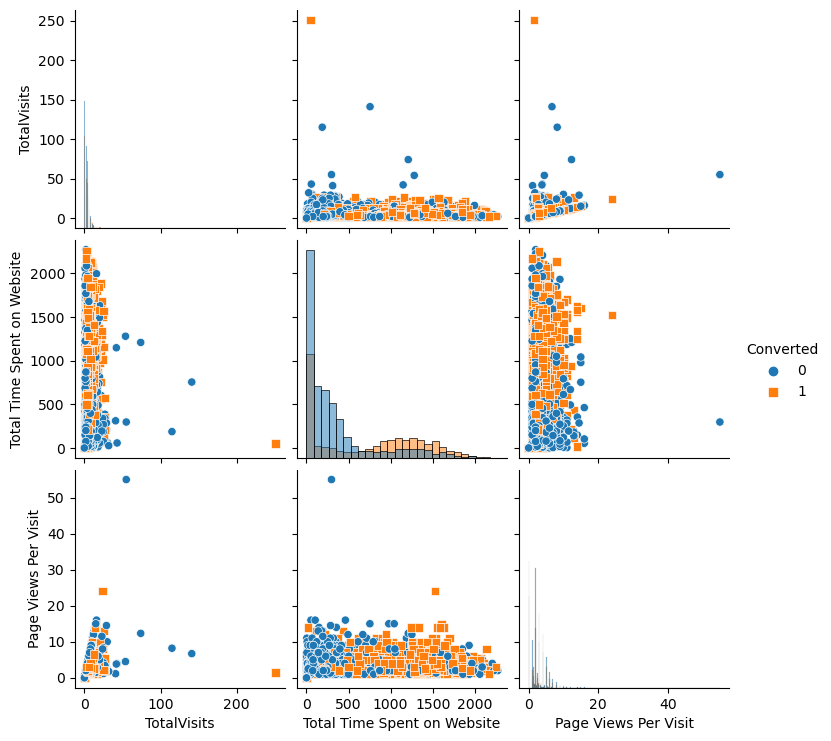

In [1479]:
# analysis between target variable and numeric variables
plt.figure(figsize=(40,100))
sns.pairplot(lead_data,diag_kind='hist',hue='Converted',markers=["o", "s", "D"])
plt.show()

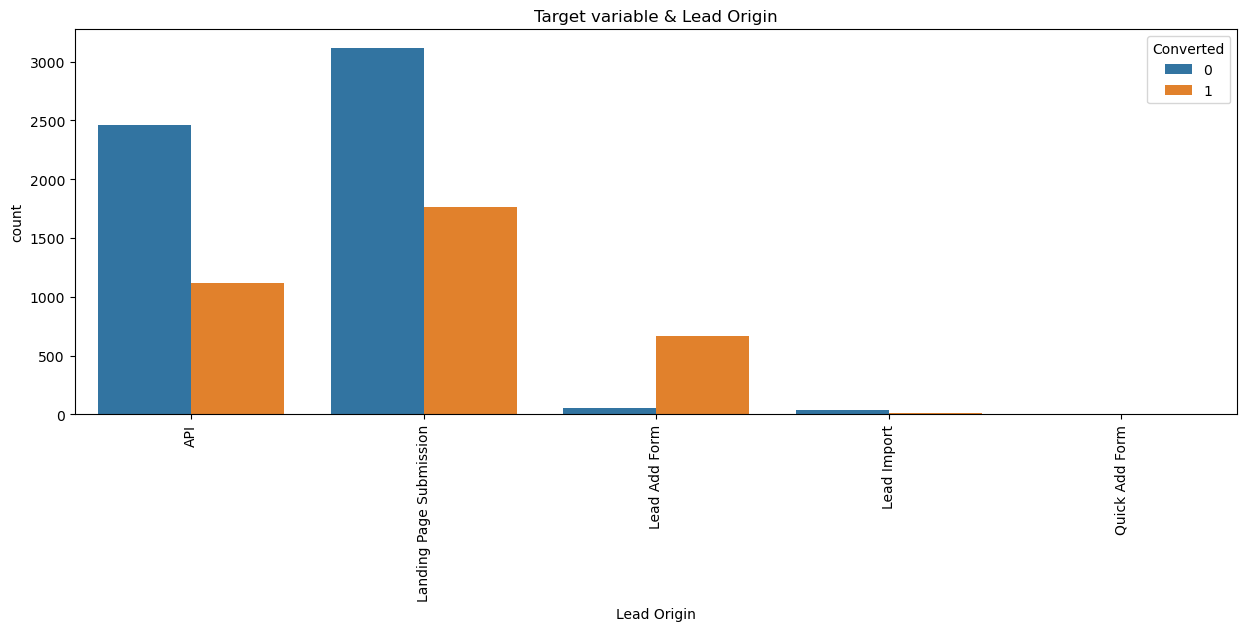

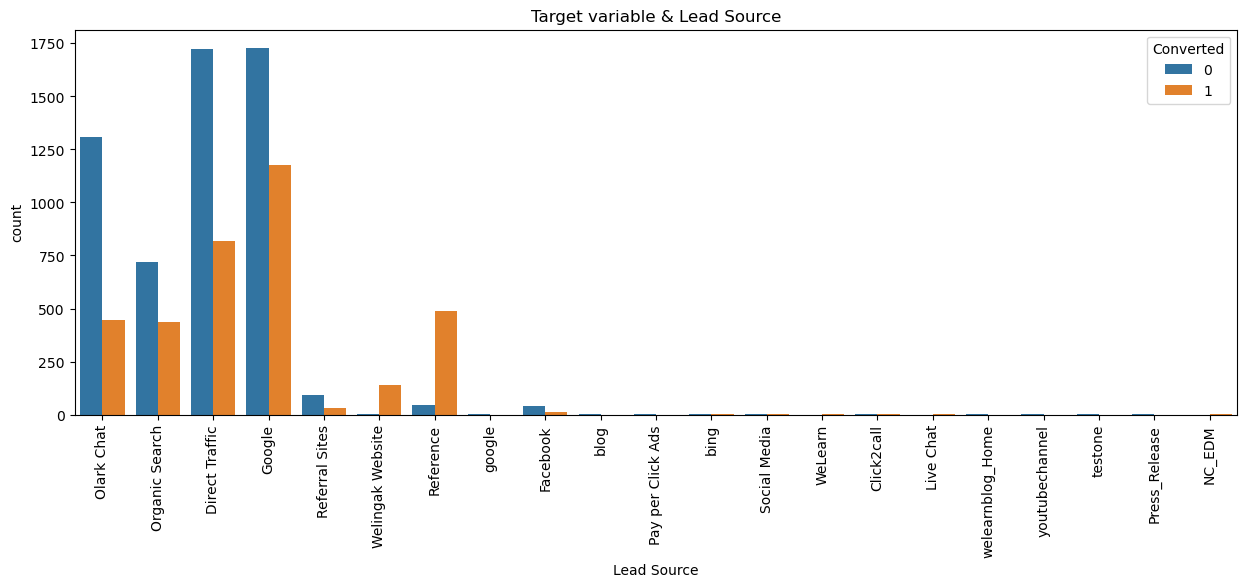

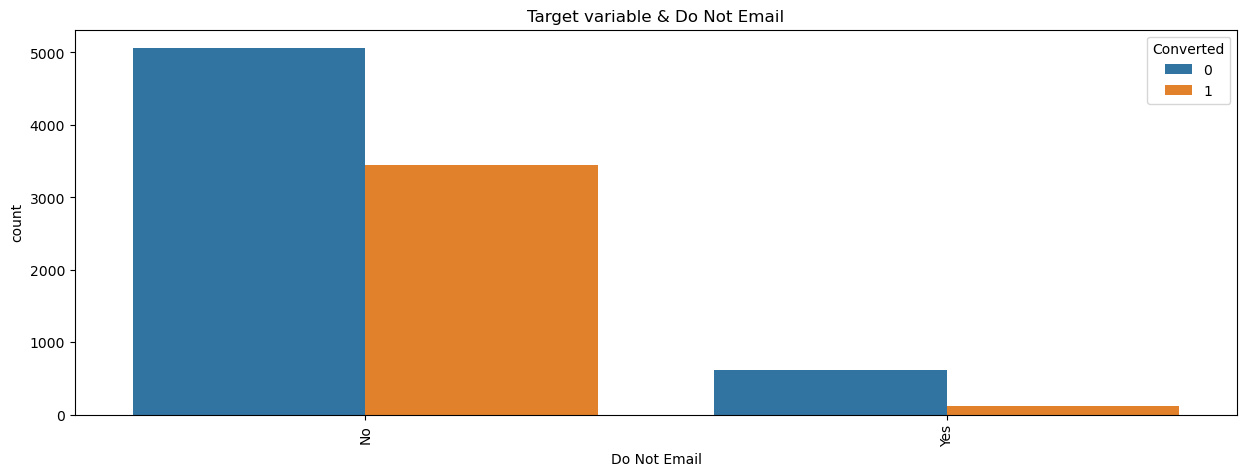

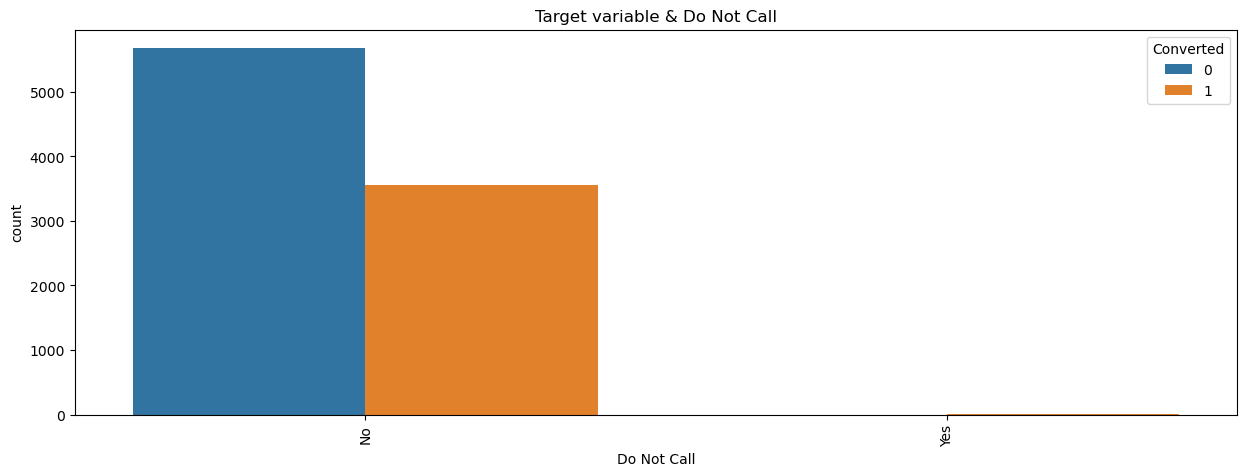

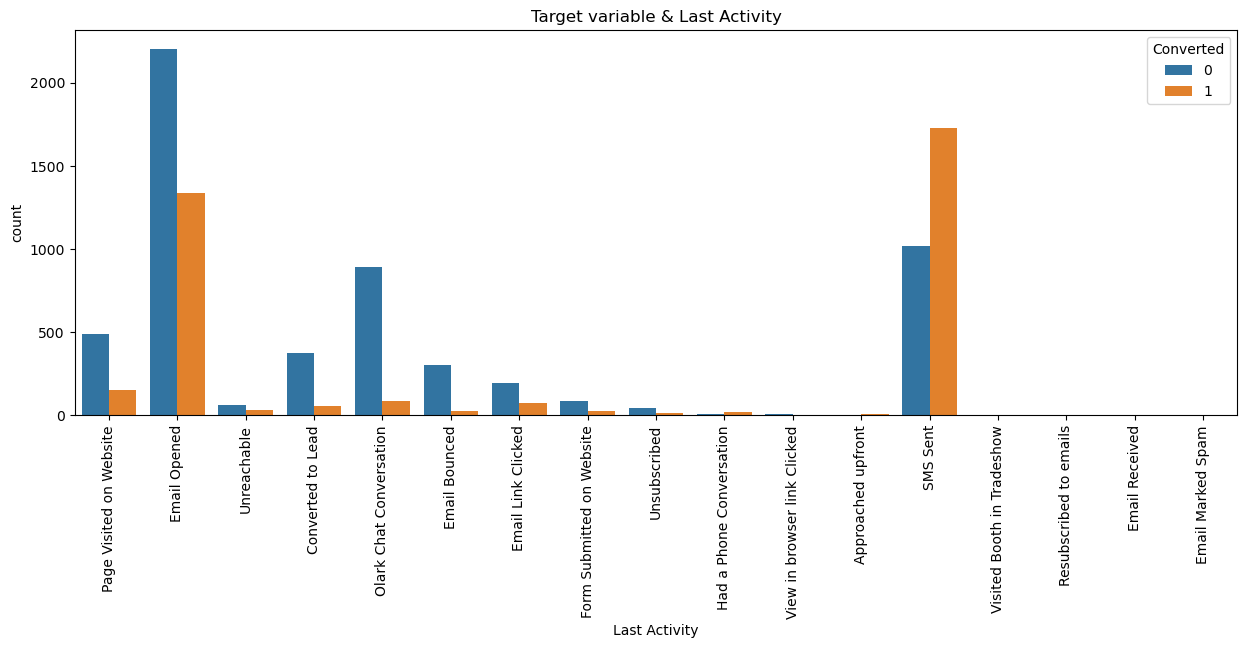

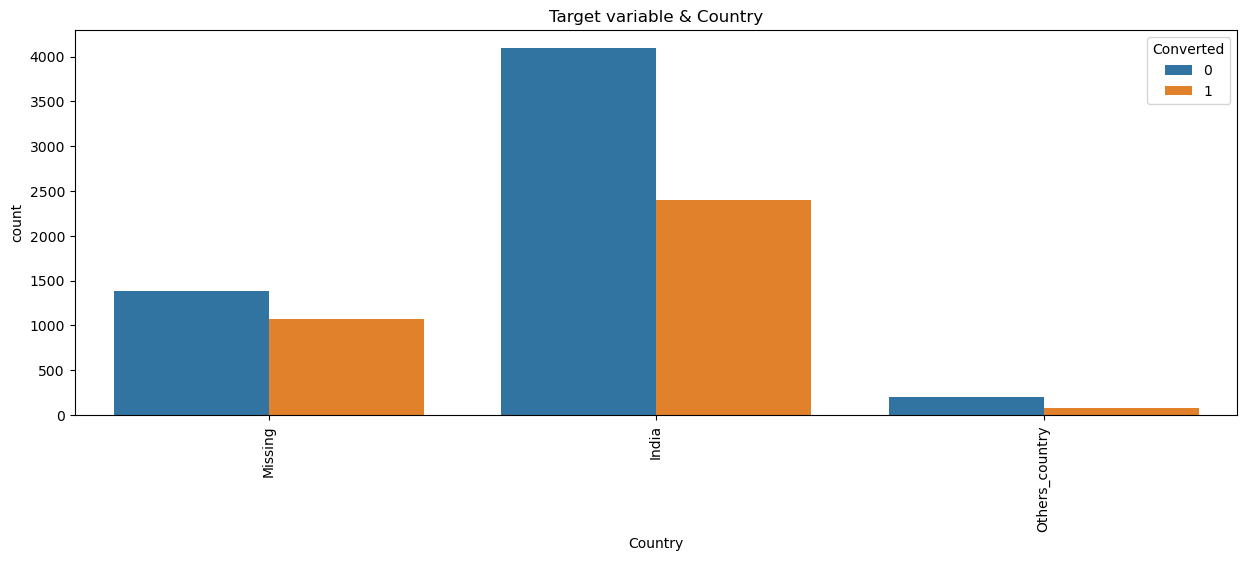

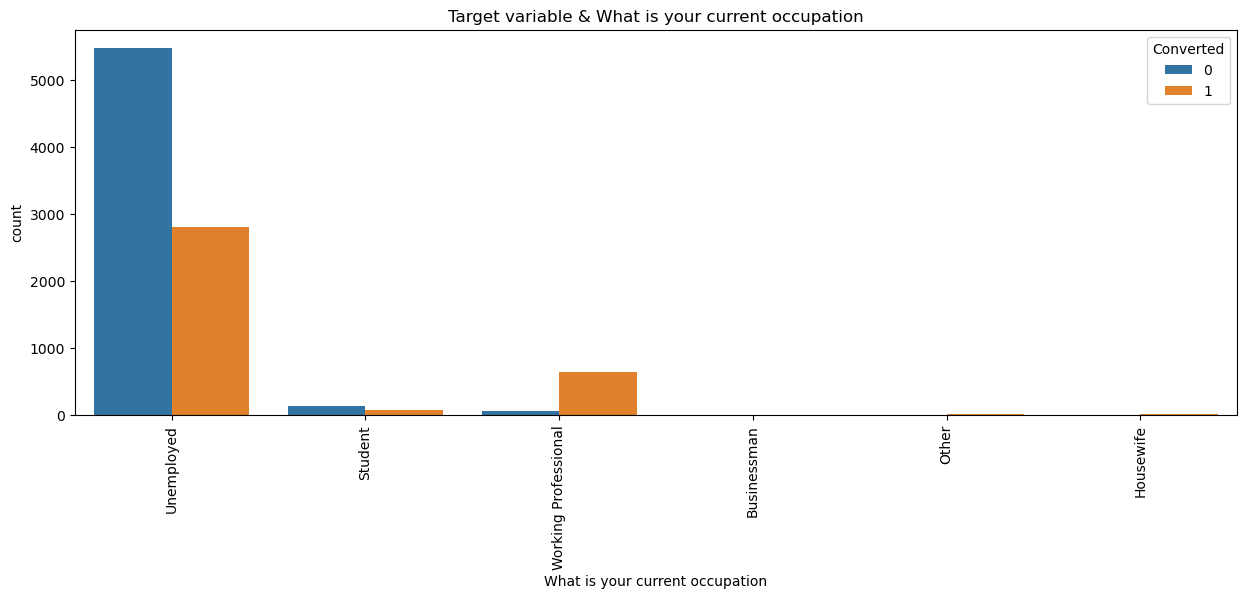

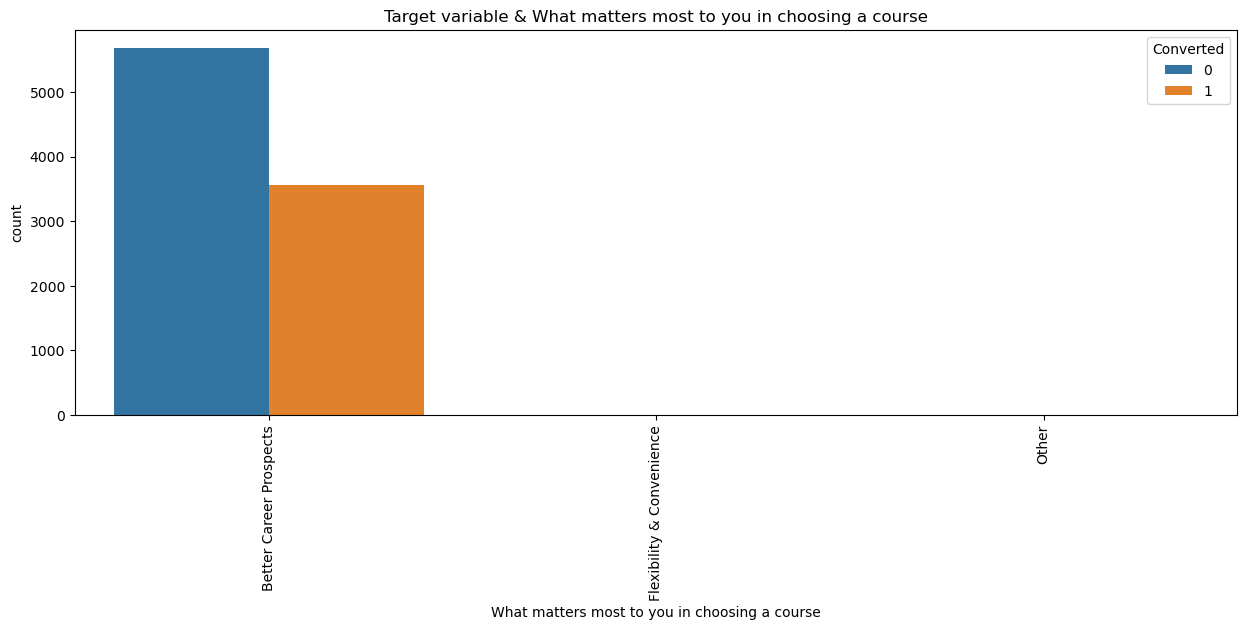

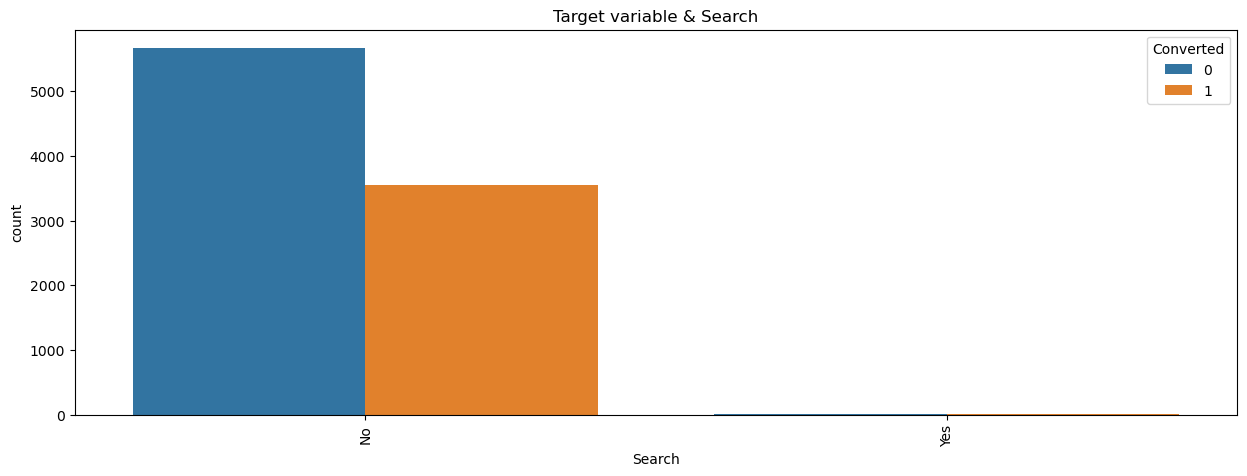

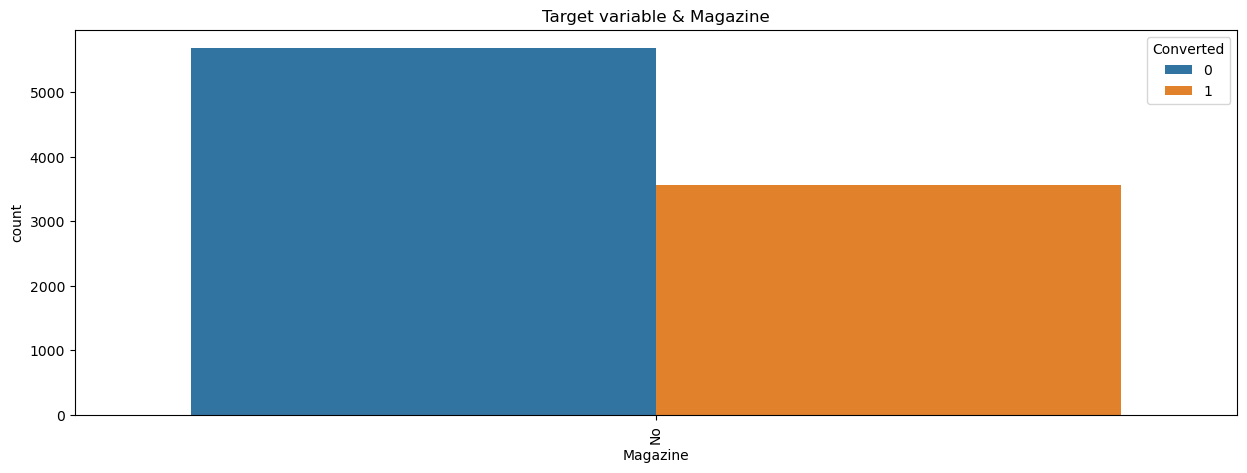

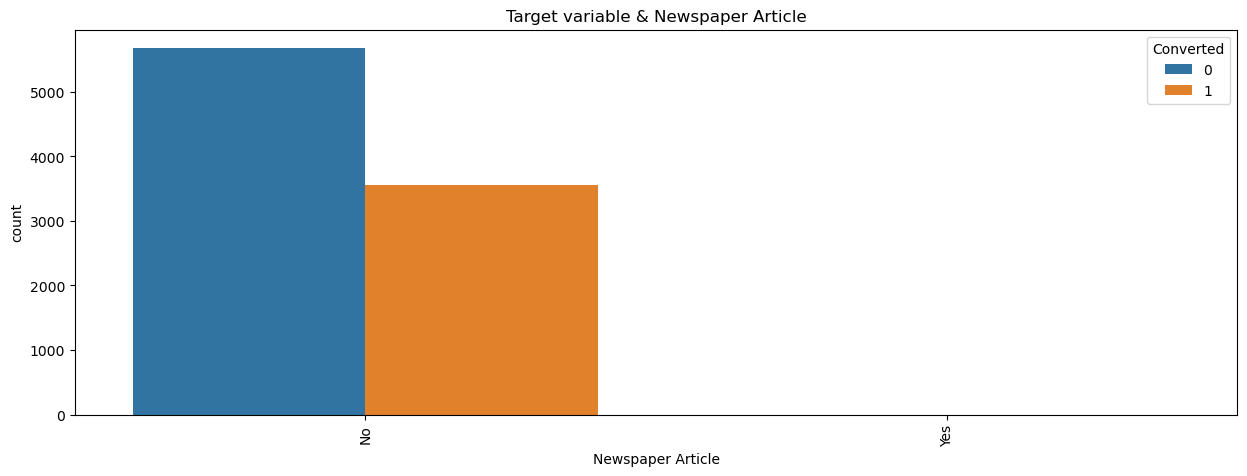

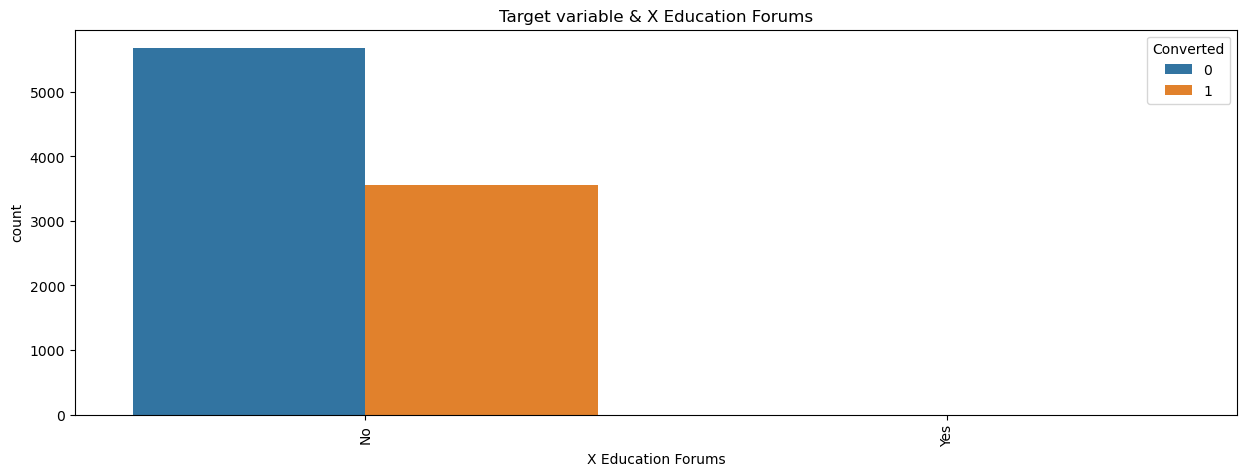

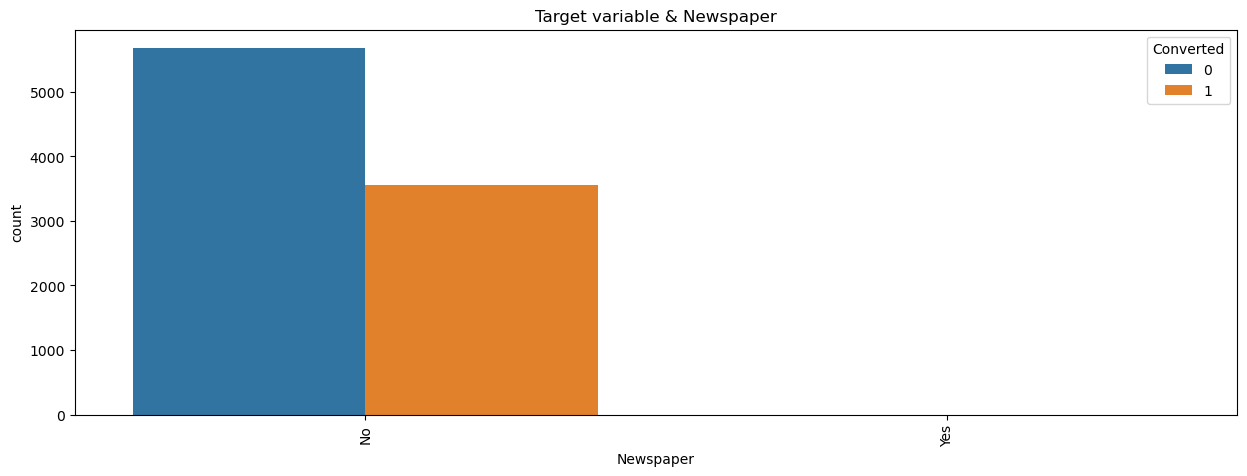

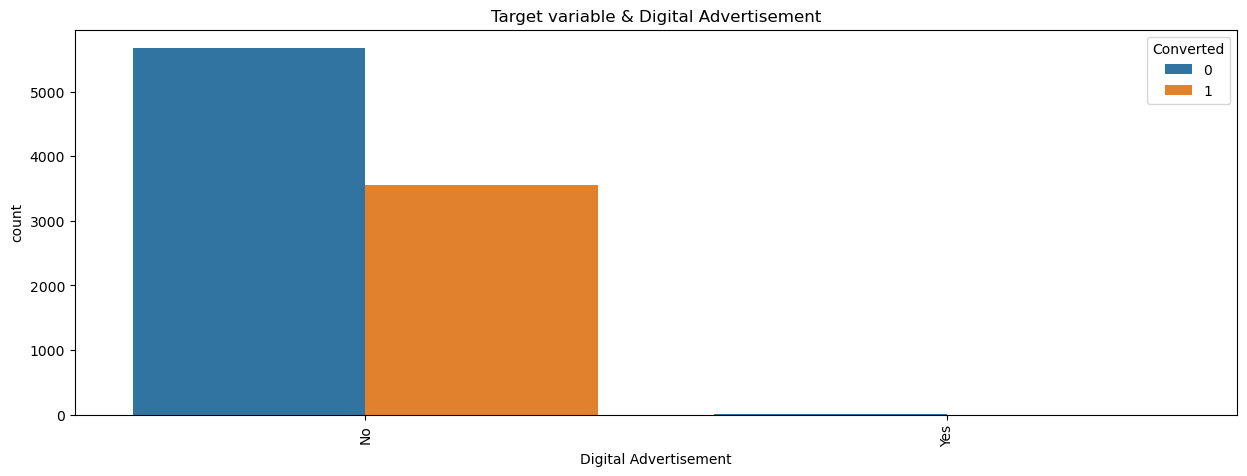

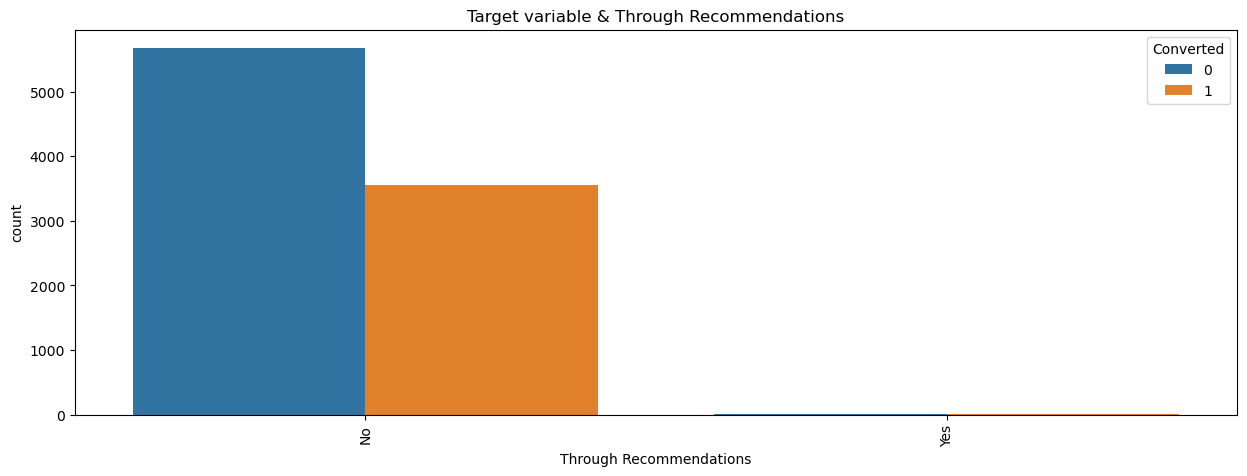

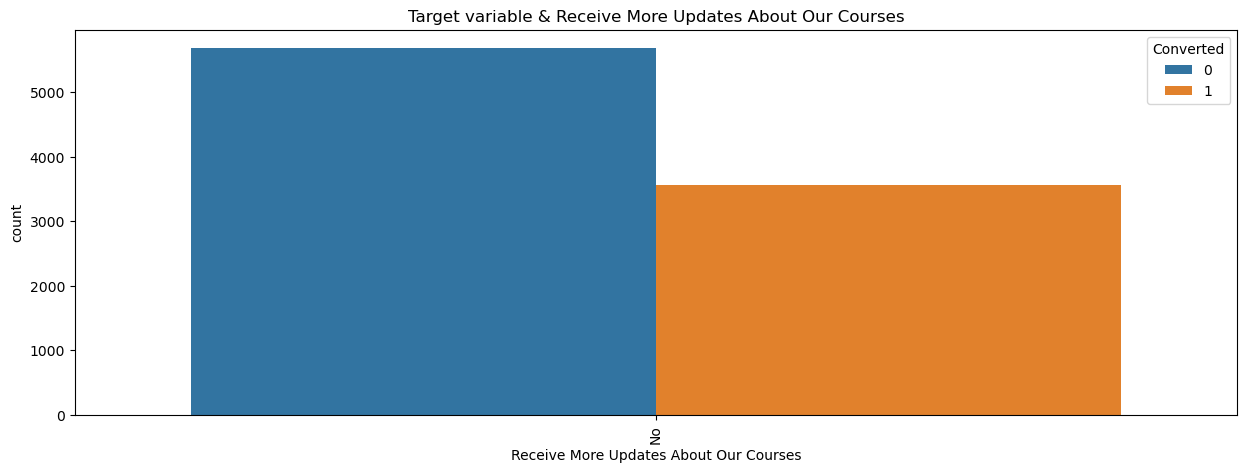

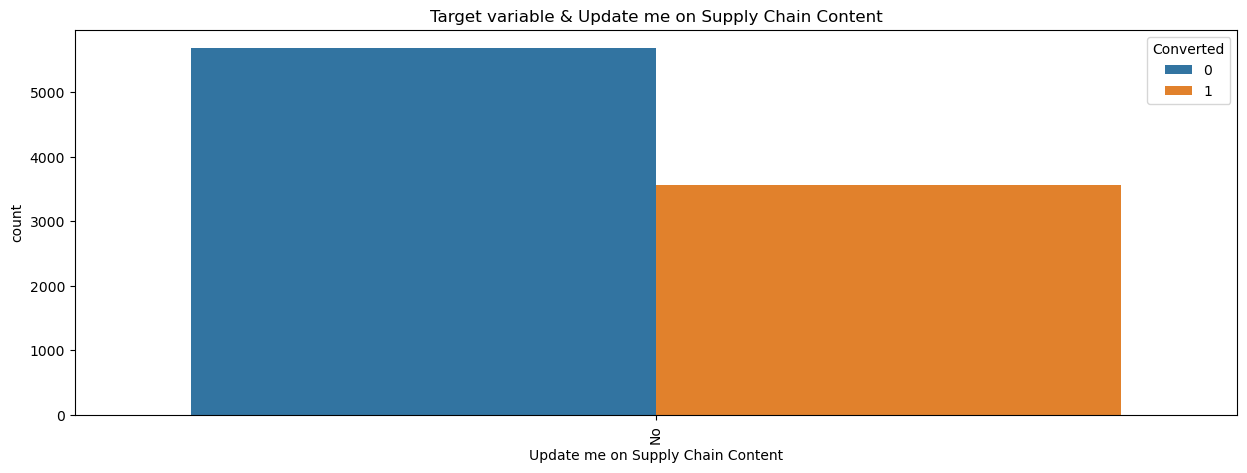

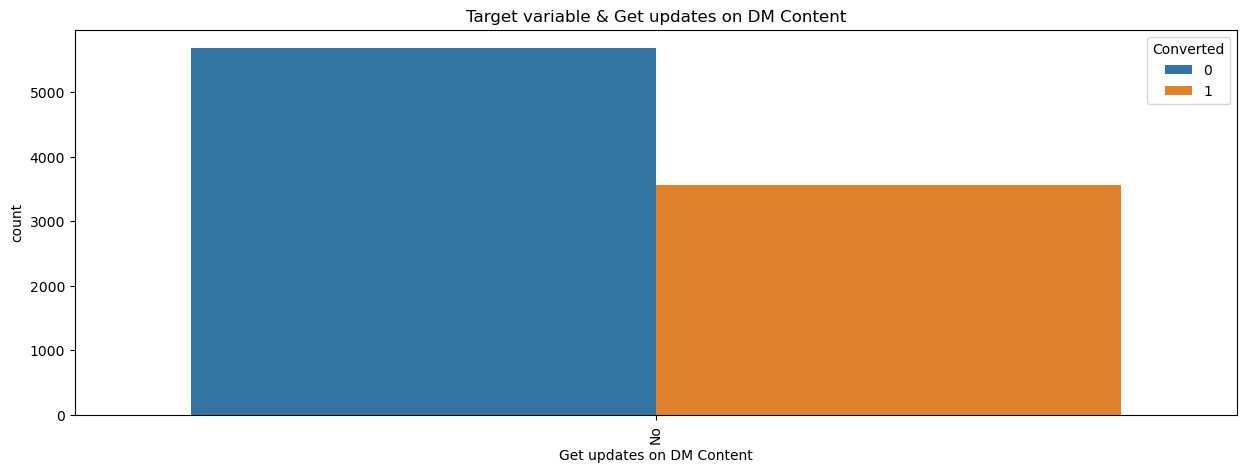

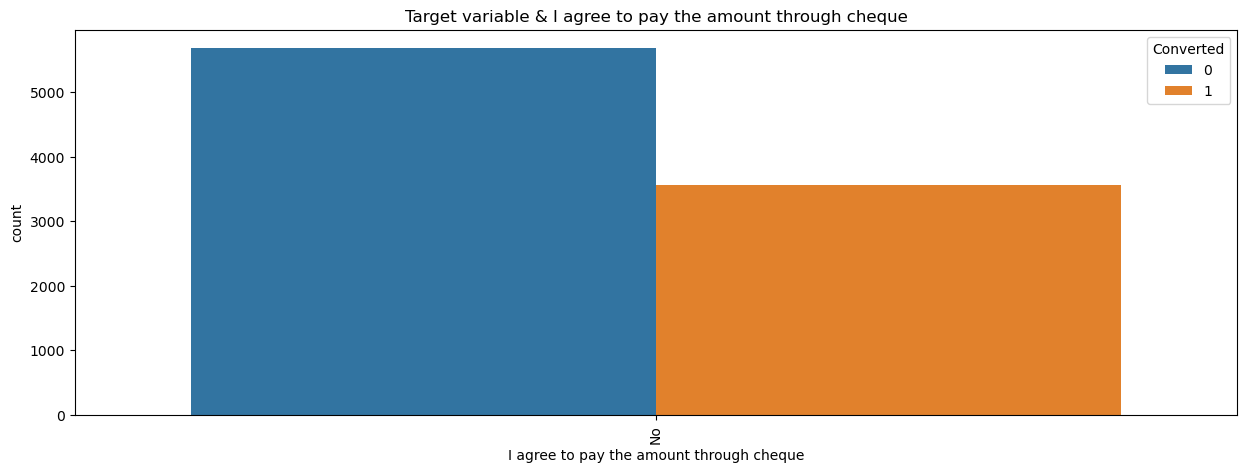

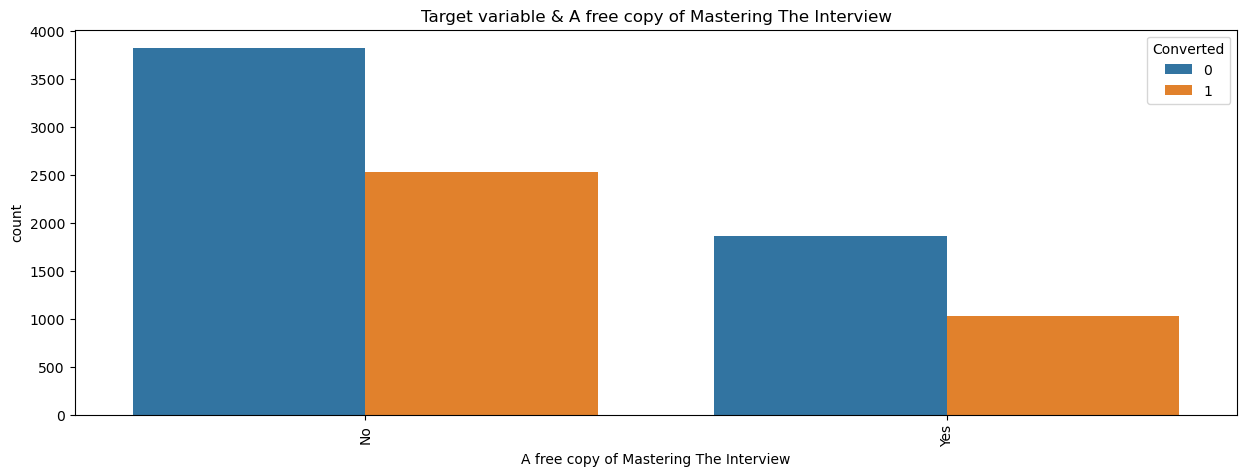

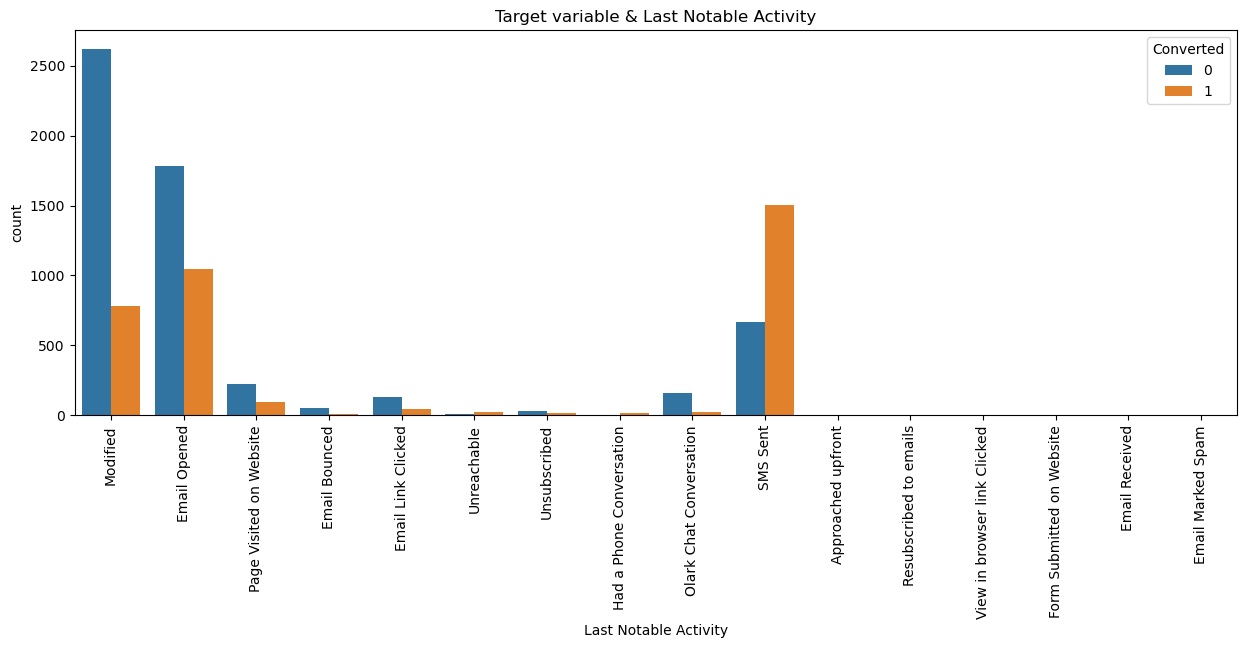

In [1480]:
# analysis between target variable and categorical variables
conv = lead_data.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(x=lead_data[i], hue=lead_data.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable &'+' '+ i)
    plt.xlabel(i)
    plt.show()

##### II: Multivariate analysis 

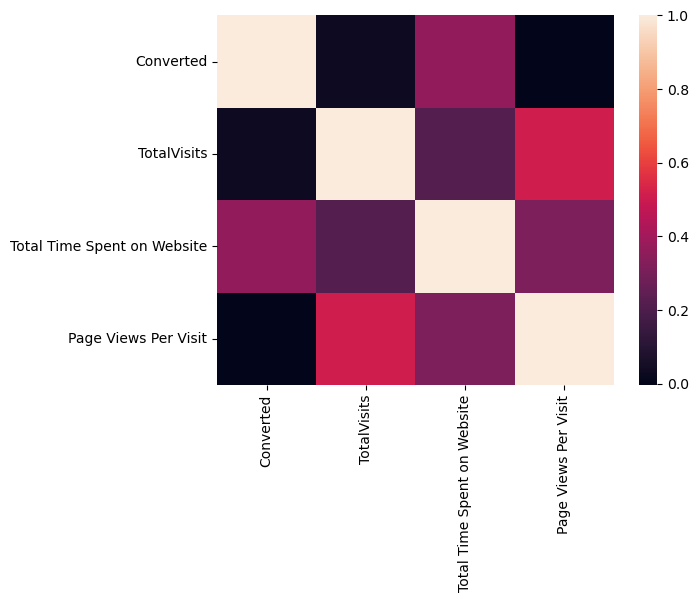

In [1481]:
# Multivariate analysis between all numeric variables
sns.heatmap(lead_data.corr())
plt.show()

# STEP 4: Preparing Data for Modelling

### I:Binary Variables handling(Yes/No)

In [1482]:
# check binary vars(Yes/No)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [1483]:
print(lead_data["Do Not Email"].value_counts())
print(lead_data["Do Not Call"].value_counts())
print(lead_data["Search"].value_counts())
print(lead_data["Magazine"].value_counts())
print(lead_data["Newspaper Article"].value_counts())
print(lead_data["X Education Forums"].value_counts())
print(lead_data["Newspaper"].value_counts())
print(lead_data["Digital Advertisement"].value_counts())
print(lead_data["Through Recommendations"].value_counts())
print(lead_data["Receive More Updates About Our Courses"].value_counts())
print(lead_data["Get updates on DM Content"].value_counts())
print(lead_data["Update me on Supply Chain Content"].value_counts())
print(lead_data["I agree to pay the amount through cheque"].value_counts())
print(lead_data["A free copy of Mastering The Interview"].value_counts())


No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


- We have total 14 binary variables, let's covert into 1/0 format

In [1484]:
# Check
binary_vars = ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Get updates on DM Content","Update me on Supply Chain Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]
lead_data[binary_vars].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [1485]:
# let's convert into 1/0
lead_data[binary_vars] =lead_data[binary_vars].apply(lambda x: x.map({"Yes":1,"No":0}))
lead_data[binary_vars].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### II:Dummy creation

In [1486]:
# let's see the dataset
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


- First we create dummy for - "Lead Origin","Country","What is your current occupation","What matters most to you in choosing a course"- these variables.

In [1487]:
dummy1 = pd.get_dummies(lead_data[["Lead Origin","Country","What is your current occupation","What matters most to you in choosing a course"]], drop_first=True)
dummy1

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,1,0,0,0,1,0,0,0
9236,1,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,0,0,0,0,0,1,0,0,0


In [1488]:
# Now merge it to lead_data
lead_data = pd.concat((lead_data, dummy1), axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,1,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0


In [1489]:
# Now drop original variables from main dataset
drop_vars = ["Lead Origin","Country","What is your current occupation","What matters most to you in choosing a course"]
lead_data = lead_data.drop(drop_vars,axis=1)
lead_data.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,1,0,0,0,0,1,0,0,0
1,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0
3,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0


In [1490]:
# Check dytes 
lead_data.dtypes

Lead Source                                                                 object
Do Not Email                                                                 int64
Do Not Call                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Last Activity                                                               object
Search                                                                       int64
Magazine                                                                     int64
Newspaper Article                                                            int64
X Education Forums                                                           int64
News

###### Now creating dummy for Lead Source

In [1491]:
lead_data["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1492]:
# create dummy
dummy_2 = pd.get_dummies(lead_data["Lead Source"], prefix="Lead_Source")
dummy_2.head()

,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1493]:
# Now merge to main dataset
lead_data = pd.concat((lead_data,dummy_2),axis=1)
lead_data.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel
0,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1494]:
# Drop "Lead Source" from main dataset
lead_data = lead_data.drop("Lead Source",axis=1)
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel
0,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1495]:
# check dtypes
lead_data.dtypes

Do Not Email                                                                 int64
Do Not Call                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Last Activity                                                               object
Search                                                                       int64
Magazine                                                                     int64
Newspaper Article                                                            int64
X Education Forums                                                           int64
Newspaper                                                                    int64
Digi

##### Creating dummy for "Last Activity"

In [1496]:
lead_data["Last Activity"].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1497]:
# create dummy
dummy_3 = pd.get_dummies(lead_data["Last Activity"], prefix="Last_Activity")
dummy_3.head()

,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1498]:
# Now merge to main dataset
lead_data = pd.concat((lead_data,dummy_3),axis=1)
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,...,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow
0,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1499]:
# Drop "Last Activity" from main dataset
lead_data = lead_data.drop("Last Activity",axis=1)
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,...,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Creating dummy for Last Notable Activity

In [1500]:
lead_data["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1501]:
# Create dummy
dummy_4 = pd.get_dummies(lead_data["Last Notable Activity"], prefix="Last_Notable_Activity")
dummy_4

,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1502]:
# Now merge to main dataset
lead_data = pd.concat((lead_data,dummy_4),axis=1)
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,...,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1503]:
# Drop "Last Activity" from main dataset
lead_data = lead_data.drop("Last Notable Activity",axis=1)
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,...,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


- Dummy creation completed.

In [1504]:
# Check shape 
lead_data.shape

(9240, 85)

### III: Outlier Treatment

Check oulier between continious variables

In [1505]:
num_vars = lead_data[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_vars.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


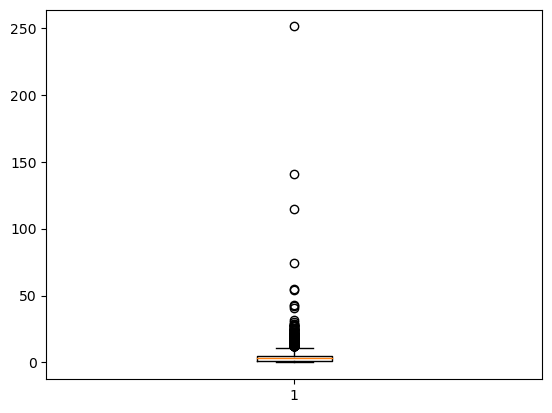

In [1506]:
# visualize "TotalVisits" for checking outlier
plt.boxplot(lead_data["TotalVisits"])
plt.show()

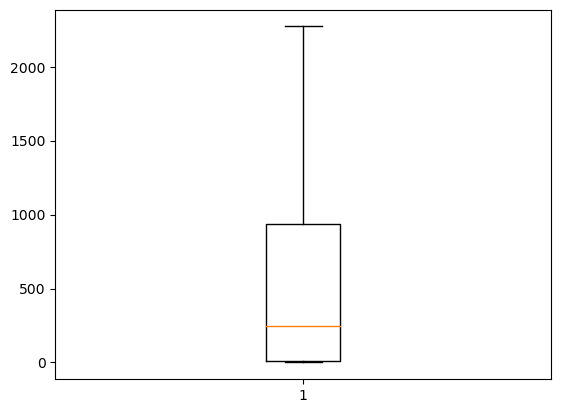

In [1507]:
# visualize "Total Time Spent on Website" for checking outlier
plt.boxplot(lead_data["Total Time Spent on Website"])
plt.show()

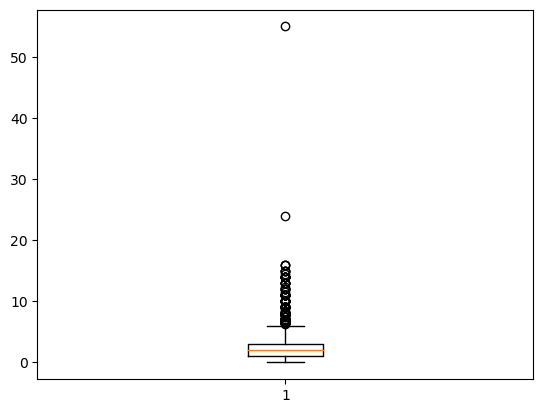

In [1508]:
# visualize "Total Time Spent on Website" for checking outlier
plt.boxplot(lead_data["Page Views Per Visit"])
plt.show()

- From these distribution shown above, we can see that there no outliers in your data. The numbers are gradually increasing.

### IV: Train-Test Split

In [1509]:
# import library
import sklearn
from sklearn.model_selection import train_test_split

In [1510]:
lead_train, lead_test = train_test_split(lead_data, train_size=0.70, test_size=0.30, random_state=100)
print(lead_test.shape)
print(lead_train.shape)

(2772, 85)
(6468, 85)


### V:Scaling on Train dataset

In [1511]:
# import library
from sklearn.preprocessing import StandardScaler

In [1512]:
# Scale on continious variables
scaler = StandardScaler()
continious_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
lead_train[continious_vars]=scaler.fit_transform(lead_train[continious_vars])
lead_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,...,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
1871,0,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0,0.099483,0.005716,-0.473232,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0,0.288795,-0.691418,0.067847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0,0.288795,1.365219,1.223999,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### VI: Divide X & y from Train dataset

In [1513]:
y_train_lead = lead_train.pop("Converted")
X_train_lead = lead_train

In [1514]:
X_train_lead.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,What is your current occupation_Other,...,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
1871,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.099483,0.005716,-0.473232,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.288795,-0.691418,0.067847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.288795,1.365219,1.223999,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1515]:
y_train_lead.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

- Data Preparation completed.

### Check converted rate from train dataset

In [1516]:
converted_rate = (sum(lead_data["Converted"])/len(lead_data["Converted"]))*100

In [1517]:
print("converted_rate is:",converted_rate)

converted_rate is: 38.53896103896104


- Here we see that converted rate is very low, So now we will build a logistic regression model for increase converted rate.

# STEP 5:Model Building

### I: Variable selection using RFE 

In [1518]:
# import library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [1519]:
# Build a model
model1 = LogisticRegression()


In [1520]:
# Running RFE on log model
rfe = RFE(estimator=model1, n_features_to_select=15)
rfe = rfe.fit(X_train_lead, y_train_lead)

In [1521]:
# Check variable name,rfe_support and rfe_ranking
list(zip(X_train_lead.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 53),
 ('Search', False, 26),
 ('Magazine', False, 63),
 ('Newspaper Article', False, 28),
 ('X Education Forums', False, 44),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 7),
 ('Through Recommendations', False, 22),
 ('Receive More Updates About Our Courses', False, 68),
 ('Update me on Supply Chain Content', False, 64),
 ('Get updates on DM Content', False, 66),
 ('I agree to pay the amount through cheque', False, 67),
 ('A free copy of Mastering The Interview', False, 62),
 ('Lead Origin_Landing Page Submission', False, 43),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Country_Missing', False, 18),
 ('Country_Others_country', False, 59),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_

In [1522]:
# Separate rfe support column
rfe_support_vars = X_train_lead.columns[rfe.support_]
rfe_support_vars

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Approached upfront',
       'Last_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website'],
      dtype='object')

In [1523]:
# Check non-rfe support column
X_train_lead.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Country_Missing',
       'Country_Others_country', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Lead_Source_Click2call', 'Lead_Source_Direct Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_S

In [1524]:
# create a new dataframe with rfe suport column
X_train_final = X_train_lead[rfe_support_vars]
X_train_final.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Working Professional,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Approached upfront,Last_Activity_Olark Chat Conversation,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website
1871,0,-0.885371,0,0,0,1,0,0,0,0,1,0,0,0,0
6795,0,0.005716,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,1,0,0,0,0,1,0,0,0,0
8105,0,1.365219,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,0,0,0,0,1,0,0


In [1525]:
# Check shape
X_train_final.shape

(6468, 15)

- Top 15 variables selection completed.

### II: Build  Model using GLM

In [1526]:
# Build a model
X_train_final = sm.add_constant(X_train_final)
model2 = sm.GLM(y_train_lead,X_train_final, family = sm.families.Binomial())
model2= model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.9
Date:                Fri, 17 Nov 2023   Deviance:                       5399.9
Time:                        23:50:04   Pearson chi2:                 7.09e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3901
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0842      0.068      1.239      0.215      -0.049       0.217
Do Not Email                                            -1.6014      0.169     -9.503      0.000      -1.932      -1.271
Total Time Spent on Website                              1.0933      0.039     27.876      0.000       1.016       1.170
Lead Origin_Lead Add Form                                3.7777      0.190     19.852      0.000       3.405       4.151
What is your current occupation_Housewife               23.9817   2.26e+04      0.001      0.999   -4.43e+04    4.43e+04
What is your current occupation_Working Professional     2.7584      0.186     14.820      0.000       2.394       3.123
Lead_Source_Olark Chat                                   1.1561      0.102     11.306      0.000       0.956       1.357
Lead_Source_Welingak Website                             2.0212      0.746      2.710      0.007       0.559       3.483
Last_Activity_Approached upfront                        23.3599   2.66e+04      0.001      0.999   -5.21e+04    5.22e+04
Last_Activity_Olark Chat Conversation                   -1.0569      0.192     -5.504      0.000      -1.433      -0.681
Last_Notable_Activity_Email Link Clicked                -1.9051      0.272     -6.998      0.000      -2.439      -1.372
Last_Notable_Activity_Email Opened                      -1.3210      0.087    -15.251      0.000      -1.491      -1.151
Last_Notable_Activity_Had a Phone Conversation           2.1319      1.099      1.940      0.052      -0.022       4.286
Last_Notable_Activity_Modified                          -1.8561      0.095    -19.490      0.000      -2.043      -1.669
Last_Notable_Activity_Olark Chat Conversation           -1.6047      0.372     -4.309      0.000      -2.335      -0.875
Last_Notable_Activity_Page Visited on Website           -1.5619      0.192     -8.150      0.000      -1.937      -1.186
========================================================================================================================
"""

Let's predict on data set

In [1527]:
# predict on train data set
y_train_pred = model2.predict(X_train_final)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.25947869, 0.22608629, 0.30224466, ..., 0.25947869, 0.09417034,
       0.17026234])

###### Create a new dataframe with original converted and predicted converted probablity

In [1528]:
y_train_pred_df = pd.DataFrame({"Converted":y_train_lead.values,"Converted_probablity":y_train_pred})
y_train_pred_df["Prospect ID"] = y_train_lead.index
y_train_pred_df.head()

,Converted,Converted_probablity,Prospect ID
0,0,0.259479,1871
1,0,0.226086,6795
2,0,0.302245,3516
3,0,0.828747,8105
4,0,0.170262,3934


##### Creating new column "Predicted" with 1 if Coverted_probablity > 0.5 else 0

In [1529]:
y_train_pred_df["Predicted"] = y_train_pred_df["Converted_probablity"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_probablity,Prospect ID,Predicted
0,0,0.259479,1871,0
1,0,0.226086,6795,0
2,0,0.302245,3516,0
3,0,0.828747,8105,1
4,0,0.170262,3934,0


##### Now check the confusion metrix

In [1530]:
# import libarary
from sklearn import metrics

In [1531]:
# create confusion metrix of this model
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted)
print(confusion)


[[3546  456]
 [ 748 1718]]


##### Check Accuracy of this model

In [1532]:
print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted))

0.8138528138528138


##### Accuracy of this model is good, but we have few variable which have a P-value >0.5. We need to handle them .But first we check multicollinearity using VIF

### III:Create VIF for checking Multicollinearity

In [1533]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1534]:
# create vif for all variables without constant
X_train_final_md = X_train_final.drop("const", axis=1)
VIF = pd.DataFrame()
VIF["Variables"]= X_train_final_md.columns
VIF["vif"] = [variance_inflation_factor(X_train_final_md.values,i) for i in range(X_train_final_md.shape[1])]
VIF["vif"] = round(VIF["vif"],2)
VIF = VIF.sort_values(by= "vif", ascending=False)
VIF

,Variables,vif
8,Last_Activity_Olark Chat Conversation,1.90
5,Lead_Source_Olark Chat,1.66
12,Last_Notable_Activity_Modified,1.52
2,Lead Origin_Lead Add Form,1.42
13,Last_Notable_Activity_Olark Chat Conversation,1.30
6,Lead_Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20
4,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11
10,Last_Notable_Activity_Email Opened,1.10


- All variables VIF is less than 5. So we drop variables which have high P-values.

##### Drop "What is your current occupation_Housewife"- It's  have high VIF value

In [1535]:
# drop variable
X_train_final = X_train_final.drop("What is your current occupation_Housewife", axis=1)
X_train_final.shape

(6468, 15)

### IV: Re-Build Model

In [1536]:
# Build a model
model3 = sm.GLM(y_train_lead,X_train_final, family = sm.families.Binomial())
model3= model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.4
Date:                Fri, 17 Nov 2023   Deviance:                       5414.7
Time:                        23:50:06   Pearson chi2:                 7.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0854      0.068      1.258      0.208      -0.048       0.219
Do Not Email                                            -1.6058      0.169     -9.529      0.000      -1.936      -1.275
Total Time Spent on Website                              1.0923      0.039     27.886      0.000       1.015       1.169
Lead Origin_Lead Add Form                                3.7944      0.190     19.980      0.000       3.422       4.167
What is your current occupation_Working Professional     2.7521      0.186     14.789      0.000       2.387       3.117
Lead_Source_Olark Chat                                   1.1496      0.102     11.256      0.000       0.949       1.350
Lead_Source_Welingak Website                             1.9972      0.746      2.678      0.007       0.535       3.459
Last_Activity_Approached upfront                        22.3502   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
Last_Activity_Olark Chat Conversation                   -1.0623      0.192     -5.534      0.000      -1.438      -0.686
Last_Notable_Activity_Email Link Clicked                -1.8867      0.270     -6.995      0.000      -2.415      -1.358
Last_Notable_Activity_Email Opened                      -1.3148      0.087    -15.193      0.000      -1.484      -1.145
Last_Notable_Activity_Had a Phone Conversation           2.1302      1.099      1.938      0.053      -0.024       4.284
Last_Notable_Activity_Modified                          -1.8478      0.095    -19.433      0.000      -2.034      -1.661
Last_Notable_Activity_Olark Chat Conversation           -1.5961      0.372     -4.286      0.000      -2.326      -0.866
Last_Notable_Activity_Page Visited on Website           -1.5616      0.192     -8.150      0.000      -1.937      -1.186
========================================================================================================================
"""

In [1537]:
# Re-check VIF for all variables without constant
X_train_final_md = X_train_final.drop("const", axis=1)
VIF = pd.DataFrame()
VIF["Variables"]= X_train_final_md.columns
VIF["vif"] = [variance_inflation_factor(X_train_final_md.values,i) for i in range(X_train_final_md.shape[1])]
VIF["vif"] = round(VIF["vif"],2)
VIF = VIF.sort_values(by= "vif", ascending=False)
VIF

,Variables,vif
7,Last_Activity_Olark Chat Conversation,1.90
4,Lead_Source_Olark Chat,1.66
11,Last_Notable_Activity_Modified,1.52
2,Lead Origin_Lead Add Form,1.41
12,Last_Notable_Activity_Olark Chat Conversation,1.30
5,Lead_Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20
3,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11
9,Last_Notable_Activity_Email Opened,1.10


##### Drop "Last_Activity_Approached upfront"- It's have high P-value

In [1538]:
X_train_final = X_train_final.drop("Last_Activity_Approached upfront", axis=1)
X_train_final.shape

(6468, 14)

### V: Build another Model

In [1539]:
# Build  model
model4 = sm.GLM(y_train_lead,X_train_final, family = sm.families.Binomial())
model4= model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.8
Date:                Fri, 17 Nov 2023   Deviance:                       5421.6
Time:                        23:50:06   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0846      0.068      1.245      0.213      -0.049       0.218
Do Not Email                                            -1.6099      0.168     -9.555      0.000      -1.940      -1.280
Total Time Spent on Website                              1.0937      0.039     27.933      0.000       1.017       1.170
Lead Origin_Lead Add Form                                3.8006      0.190     20.039      0.000       3.429       4.172
What is your current occupation_Working Professional     2.7496      0.186     14.776      0.000       2.385       3.114
Lead_Source_Olark Chat                                   1.1562      0.102     11.329      0.000       0.956       1.356
Lead_Source_Welingak Website                             1.9898      0.746      2.668      0.008       0.528       3.451
Last_Activity_Olark Chat Conversation                   -1.0747      0.192     -5.602      0.000      -1.451      -0.699
Last_Notable_Activity_Email Link Clicked                -1.8883      0.270     -7.001      0.000      -2.417      -1.360
Last_Notable_Activity_Email Opened                      -1.3155      0.087    -15.198      0.000      -1.485      -1.146
Last_Notable_Activity_Had a Phone Conversation           2.1317      1.099      1.940      0.052      -0.022       4.286
Last_Notable_Activity_Modified                          -1.8384      0.095    -19.369      0.000      -2.024      -1.652
Last_Notable_Activity_Olark Chat Conversation           -1.5874      0.372     -4.263      0.000      -2.317      -0.858
Last_Notable_Activity_Page Visited on Website           -1.5618      0.192     -8.149      0.000      -1.937      -1.186
========================================================================================================================
"""

In [1540]:
# Re-check VIF for all variables without constant
X_train_final_md = X_train_final.drop("const", axis=1)
VIF = pd.DataFrame()
VIF["Variables"]= X_train_final_md.columns
VIF["vif"] = [variance_inflation_factor(X_train_final_md.values,i) for i in range(X_train_final_md.shape[1])]
VIF["vif"] = round(VIF["vif"],2)
VIF = VIF.sort_values(by= "vif", ascending=False)
VIF

,Variables,vif
6,Last_Activity_Olark Chat Conversation,1.89
4,Lead_Source_Olark Chat,1.65
10,Last_Notable_Activity_Modified,1.51
2,Lead Origin_Lead Add Form,1.41
11,Last_Notable_Activity_Olark Chat Conversation,1.30
5,Lead_Source_Welingak Website,1.23
1,Total Time Spent on Website,1.20
3,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11
8,Last_Notable_Activity_Email Opened,1.10


#### Now we don't have any variables which contains high P-value and VIF.
####  So model4 is our final model.

# STEP 5: MODEL EVALUATION

### I: Predict on Dataset

In [1541]:
# predict on train dataset
y_train_pred1 = model4.predict(X_train_final)
y_train_pred1 = y_train_pred1.values.reshape(-1)
y_train_pred1

array([0.2605533 , 0.22711412, 0.30344151, ..., 0.2605533 , 0.09570507,
       0.17278873])

#### Create a new dataframe with original converted and predicted converted probablity

In [1542]:
y_train_pred2 = pd.DataFrame({"Converted":y_train_lead.values,"Converted_probablity":y_train_pred1})
y_train_pred2["Prospect ID"] = y_train_lead.index
y_train_pred2.head()

,Converted,Converted_probablity,Prospect ID
0,0,0.260553,1871
1,0,0.227114,6795
2,0,0.303442,3516
3,0,0.828887,8105
4,0,0.172789,3934


##### Creating new column "Predicted" with 1 if Coverted_probablity > 0.5 else 0

In [1543]:
y_train_pred2["Predicted"] = y_train_pred2["Converted_probablity"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred2.head()

,Converted,Converted_probablity,Prospect ID,Predicted
0,0,0.260553,1871,0
1,0,0.227114,6795,0
2,0,0.303442,3516,0
3,0,0.828887,8105,1
4,0,0.172789,3934,0


### II: Confusion Matrix

In [1544]:
# create confusion metrix of this model
confusion = metrics.confusion_matrix(y_train_pred2.Converted, y_train_pred2.Predicted)
print(confusion)

[[3544  458]
 [ 751 1715]]


### III: Accuracy

In [1545]:
#check accuracy
print(metrics.accuracy_score(y_train_pred2.Converted, y_train_pred2.Predicted))

0.8130797773654916


##### Accuracy of this model is 81%, that is good.
##### But accuracy is not enough to asses the goodness of this model, so we used another evaluation metrics.

### IV: Sensitivity & Specificity

In [1546]:
# Firstly calcualte the True-Negatives(TN), False-Positives(FP), False-Negatives(FN), True-Positives(TP)
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [1547]:
# Calculate Sensitivity
TP/float(TP+FN)

0.6954582319545823

- 70% "Converted" rate are correctly identify in this model

In [1548]:
# Calculate Specificity
TN/float(TN+FP)

0.8855572213893054

- 89% "Non-Converted" rate are correctly identify in this model

#### We choose cut-off point 0.5. This cut-off was chosen at random and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity.
#### Now to use ROC curve to find how good the model is and then we choose ideal cut-off point

### V: ROC Curve

In [1549]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1550]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred2.Converted, y_train_pred2.Converted_probablity, drop_intermediate = False )

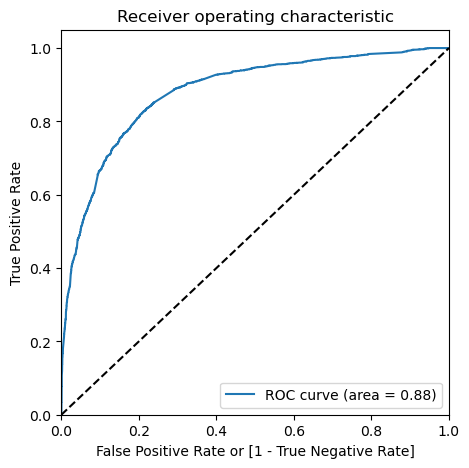

In [1551]:
# plot 
draw_roc(y_train_pred2.Converted, y_train_pred2.Converted_probablity)

- The ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and the model is almost completely random.

### VI:Finding the Optimal cut-off point

In [1552]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred2[i]= y_train_pred2.Converted_probablity.map(lambda x: 1 if x > i else 0)
y_train_pred2.head()

,Converted,Converted_probablity,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.260553,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.227114,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.303442,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.828887,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.172789,3934,0,1,1,0,0,0,0,0,0,0,0


In [1553]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred2.Converted, y_train_pred2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.586425  0.966342  0.352324
0.2   0.2  0.759276  0.904704  0.669665
0.3   0.3  0.799165  0.838605  0.774863
0.4   0.4  0.811379  0.764801  0.840080
0.5   0.5  0.813080  0.695458  0.885557
0.6   0.6  0.794836  0.585158  0.924038
0.7   0.7  0.782777  0.513382  0.948776
0.8   0.8  0.757730  0.408759  0.972764
0.9   0.9  0.715213  0.271695  0.988506


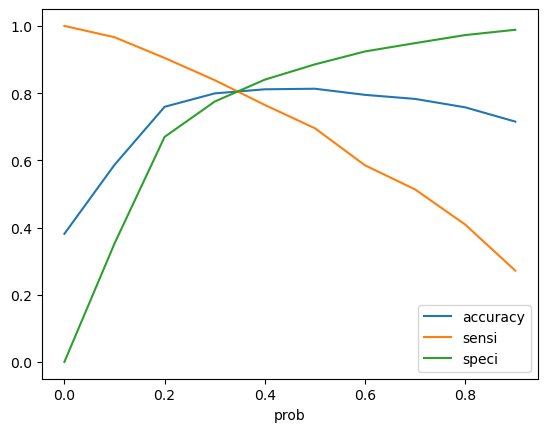

In [1554]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### In this plot, we see that balancing spot between Sensitivity and Specificity is nearby 0.4
##### So, 0.4 is the optimum point to take it as a cut-off probablity

##### Creating new column "final_predicted" with 1 if Coverted_probablity > 0.4 else 0

In [1555]:

y_train_pred2['final_predicted'] = y_train_pred2.Converted_probablity.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred2.head()

,Converted,Converted_probablity,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.260553,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.227114,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.303442,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.828887,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.172789,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [1556]:
# Re-check  accuracy score
print("Accuracy score is:",metrics.accuracy_score(y_train_pred2.Converted,y_train_pred2.final_predicted))

Accuracy score is: 0.8113790970933829


In [1557]:
# Re-Creating Confusion metrix
confusion2 = metrics.confusion_matrix(y_train_pred2.Converted, y_train_pred2.final_predicted)
confusion2

array([[3362,  640],
       [ 580, 1886]], dtype=int64)

In [1558]:
# calcualte the True-Negatives(TN), False-Positives(FP), False-Negatives(FN), True-Positives(TP)
TN2 = confusion2[0,0]
FP2 = confusion2[0,1]
FN2 = confusion2[1,0]
TP2 = confusion2[1,1]

In [1559]:
# Calculate Sensitivity
print("Senstivity Score is:",TP2/(FN2+TP2))

Senstivity Score is: 0.764801297648013


In [1560]:
# Calculate Specificity
print("Specificity Score is:",TN2/(TN2+FP2))

Specificity Score is: 0.84007996001999


### VII: Precision & Recall

In [1561]:
# Calculate Precision
print("Precision score is:",TP2/float(TP2+FP2))

Precision score is: 0.7466349960411718


- This model detected 79% "Converted" predictive rate

In [1562]:
# Calculate Recall
print("Recall score is:",TP2/float(TP2+FN2))

Recall score is: 0.764801297648013


- This metric is same as Sensitivity

### VII:Precision and recall tradeoff

In [1563]:
from sklearn.metrics import precision_recall_curve

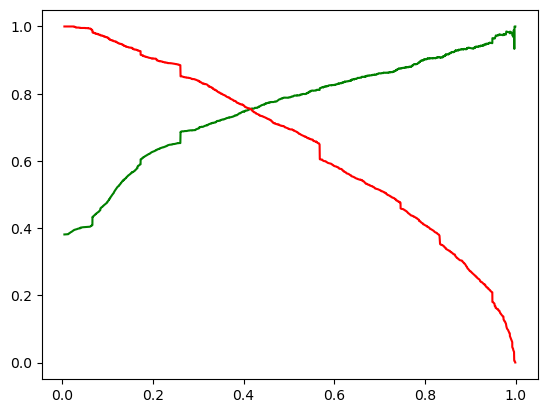

In [1564]:
# plot
p, r, thresholds = precision_recall_curve(y_train_pred2.Converted, y_train_pred2.Converted_probablity)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# STEP 7: Making Prediction on Test dataset

### I: Scaling On test Data

In [1565]:
# Scaling on continious variables
continious_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
lead_test[continious_vars] = scaler.transform(lead_test[continious_vars])
lead_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,...,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
4269,0,0,1,0.856729,0.964504,2.611381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,1,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,1,0.288795,-0.777416,1.223999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0,1,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### II: Divide X & y


In [1566]:
y_test = lead_test.pop("Converted")
X_test = lead_test

In [1567]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Missing,Country_Others_country,What is your current occupation_Housewife,What is your current occupation_Other,...,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
4269,0,0,0.856729,0.964504,2.611381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.288795,-0.777416,1.223999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1568]:
y_test.head()

4269    1
2376    1
7766    1
9199    0
4359    1
Name: Converted, dtype: int64

### III:Drop Varibales from X_test

In [1569]:
# Drop Non-RFE Supported variables
X_test = X_test[rfe_support_vars]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Working Professional,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Approached upfront,Last_Activity_Olark Chat Conversation,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website
4269,0,0.964504,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,1,0,0,0,0,0,0,0,0,0,0
9199,0,-0.885371,0,0,0,1,0,0,1,0,0,0,1,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1570]:
X_test.shape

(2772, 15)

In [1571]:
# Drop those variables which are dropped based on P-value
drop_vars = ["What is your current occupation_Housewife","Last_Activity_Approached upfront"]
X_test=X_test.drop(drop_vars, axis=1)
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Olark Chat Conversation,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website
4269,0,0.964504,0,0,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,1,0,0,0,0,0,0,0,0,0
9199,0,-0.885371,0,0,1,0,1,0,0,0,1,0,0
4359,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0


In [1572]:
X_test.shape

(2772, 13)

### IV: Add Constant in X_test

In [1573]:
X_test_final = sm.add_constant(X_test)
X_test_final.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Olark Chat Conversation,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website
4269,1.0,0,0.964504,0,0,0,0,0,0,0,0,0,0,0
2376,1.0,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0
7766,1.0,0,-0.777416,0,1,0,0,0,0,0,0,0,0,0
9199,1.0,0,-0.885371,0,0,1,0,1,0,0,0,1,0,0
4359,1.0,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0


### V: Predict on X_test_final

In [1574]:
y_test_pred = model4.predict(X_test_final)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.75758494, 0.94866957, 0.87909513, ..., 0.2605533 , 0.24710498,
       0.94866957])

In [1575]:
# Create a dataframe with actual Converted and predicted converted probablity
y_pred_df = pd.DataFrame({"Prospect ID":y_test.index,"Converted":y_test,"Converted_probablity":y_test_pred})
y_pred_df.head()

,Prospect ID,Converted,Converted_probablity
4269,4269,1,0.757585
2376,2376,1,0.948670
7766,7766,1,0.879095
9199,9199,0,0.066567
4359,4359,1,0.832195


##### Creating new column "Converted_predicted" with 1 if Coverted_probablity > 0.4 else 0

In [1576]:
y_pred_df["Converted_predicted"] = y_pred_df["Converted_probablity"].map(lambda x: 1 if x>0.4 else 0)
y_pred_df.head()

,Prospect ID,Converted,Converted_probablity,Converted_predicted
4269,4269,1,0.757585,1
2376,2376,1,0.948670,1
7766,7766,1,0.879095,1
9199,9199,0,0.066567,0
4359,4359,1,0.832195,1


##### Accuracy

In [1577]:
print("Accuracy score is:",metrics.accuracy_score(y_pred_df.Converted,y_pred_df.Converted_predicted))

Accuracy score is: 0.8152958152958153


- Accuracy score of test_model is same as train model, thats mean our model is good

##### Confusion matrix

In [1578]:
confusion3 = metrics.confusion_matrix(y_pred_df.Converted, y_pred_df.Converted_predicted)
confusion3

array([[1428,  249],
       [ 263,  832]], dtype=int64)

In [1579]:
# calcualte the True-Negatives(TN), False-Positives(FP), False-Negatives(FN), True-Positives(TP)
TN3 = confusion3[0,0]
FP3 = confusion3[0,1]
FN3 = confusion3[1,0]
TP3 = confusion3[1,1]

##### Sensitivity & Specificity

In [1580]:
# Calculate Sensitivity
print("Senstivity Score is:",TP3/(FN3+TP3))

Senstivity Score is: 0.7598173515981735


In [1581]:
# Calculate Specificity
print("Specificity Score is:",TN3/(TN3+FP3))

Specificity Score is: 0.851520572450805


- In our model, we see that:
    - 75% "Converted" rate are correctly identify in this model
    - 85% "Non-Converted" rate are correctly identify in this model
- Thats mean this model is statistically significant

##### Precision & Recall

In [1582]:
# Calculate Precision
print("Precision score is:",TP3/float(TP3+FP3))

Precision score is: 0.7696577243293247


In [1583]:
# Calculate Recall
print("Recall score is:",TP3/float(TP3+FN3))

Recall score is: 0.7598173515981735


- This model detected 76% "Converted" predictive rate